# Loan Application Status Prediction

## Project Description

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.

## Independent Variables:

1. Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
2. Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3. Married - This refers to applicant being in a state of matrimony
4. Dependents - This refres to persons who depends on the applicants for survival
5. Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6. Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7. Applicant Income - This refers to disposable income available for the applicant's use under State law.
8. CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9. Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10. Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11. Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12. Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13. Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.

You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 

### Dataset Link- https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv


In [2]:
# Import important libaraies 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import Dataset 

df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
print('No of Rows:',df.shape[0])
print('No. of Columns:',df.shape[1])

No of Rows: 614
No. of Columns: 13


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [8]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Analysis of Statistical Views 

### Befor going to statistical exploration we need to check missing values and duplicate values.

In [9]:
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


* In loan application status dataset we have 614 rows with 13 columns including target variable.
* A Target Variable is 'Loan_Status' having object datatype and It is categorical variable.
* Gender, Married, Education,Self Employed, Credit History, Loan Status are categorical features.
* There are three types of datatype dtypes: float64(4), int64(1), object(8)

# Missing Values Check

In [13]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

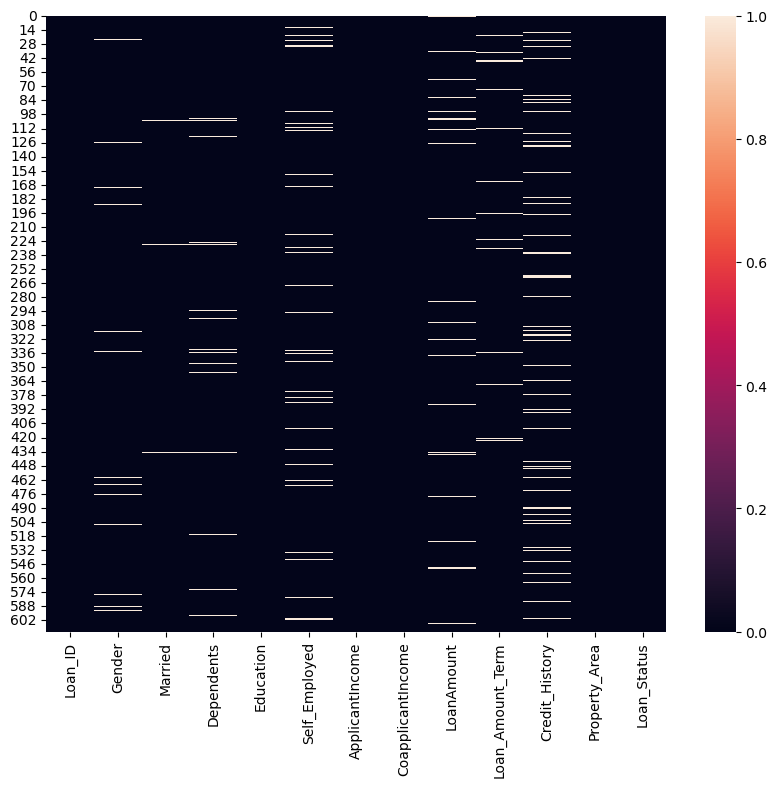

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())

In [15]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                   Missing Values  % Missing data
Credit_History                 50        8.143322
Self_Employed                  32        5.211726
LoanAmount                     22        3.583062
Dependents                     15        2.442997
Loan_Amount_Term               14        2.280130
Gender                         13        2.117264
Married                         3        0.488599
Loan_ID                         0        0.000000
Education                       0        0.000000
ApplicantIncome                 0        0.000000
CoapplicantIncome               0        0.000000
Property_Area                   0        0.000000
Loan_Status                     0        0.000000


* 7 out 13 columns contains missing value.
* As small amount of data is missing so we use mean amd mode to replace with NaN values.

### Start with Enlisting Value counts & Sub-categories of different categorial features available

In [16]:
category=['Gender','Married','Dependents','Education','Self_Employed',
          'Loan_Amount_Term','Property_Area','Credit_History','Loan_Status']
for i in category:
    print(i)
    print(df[i].value_counts())
    print('='*100)

Gender
Gender
Male      489
Female    112
Name: count, dtype: int64
Married
Married
Yes    398
No     213
Name: count, dtype: int64
Dependents
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
Education
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
Self_Employed
Self_Employed
No     500
Yes     82
Name: count, dtype: int64
Loan_Amount_Term
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64
Property_Area
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64
Credit_History
Credit_History
1.0    475
0.0     89
Name: count, dtype: int64
Loan_Status
Loan_Status
Y    422
N    192
Name: count, dtype: int64


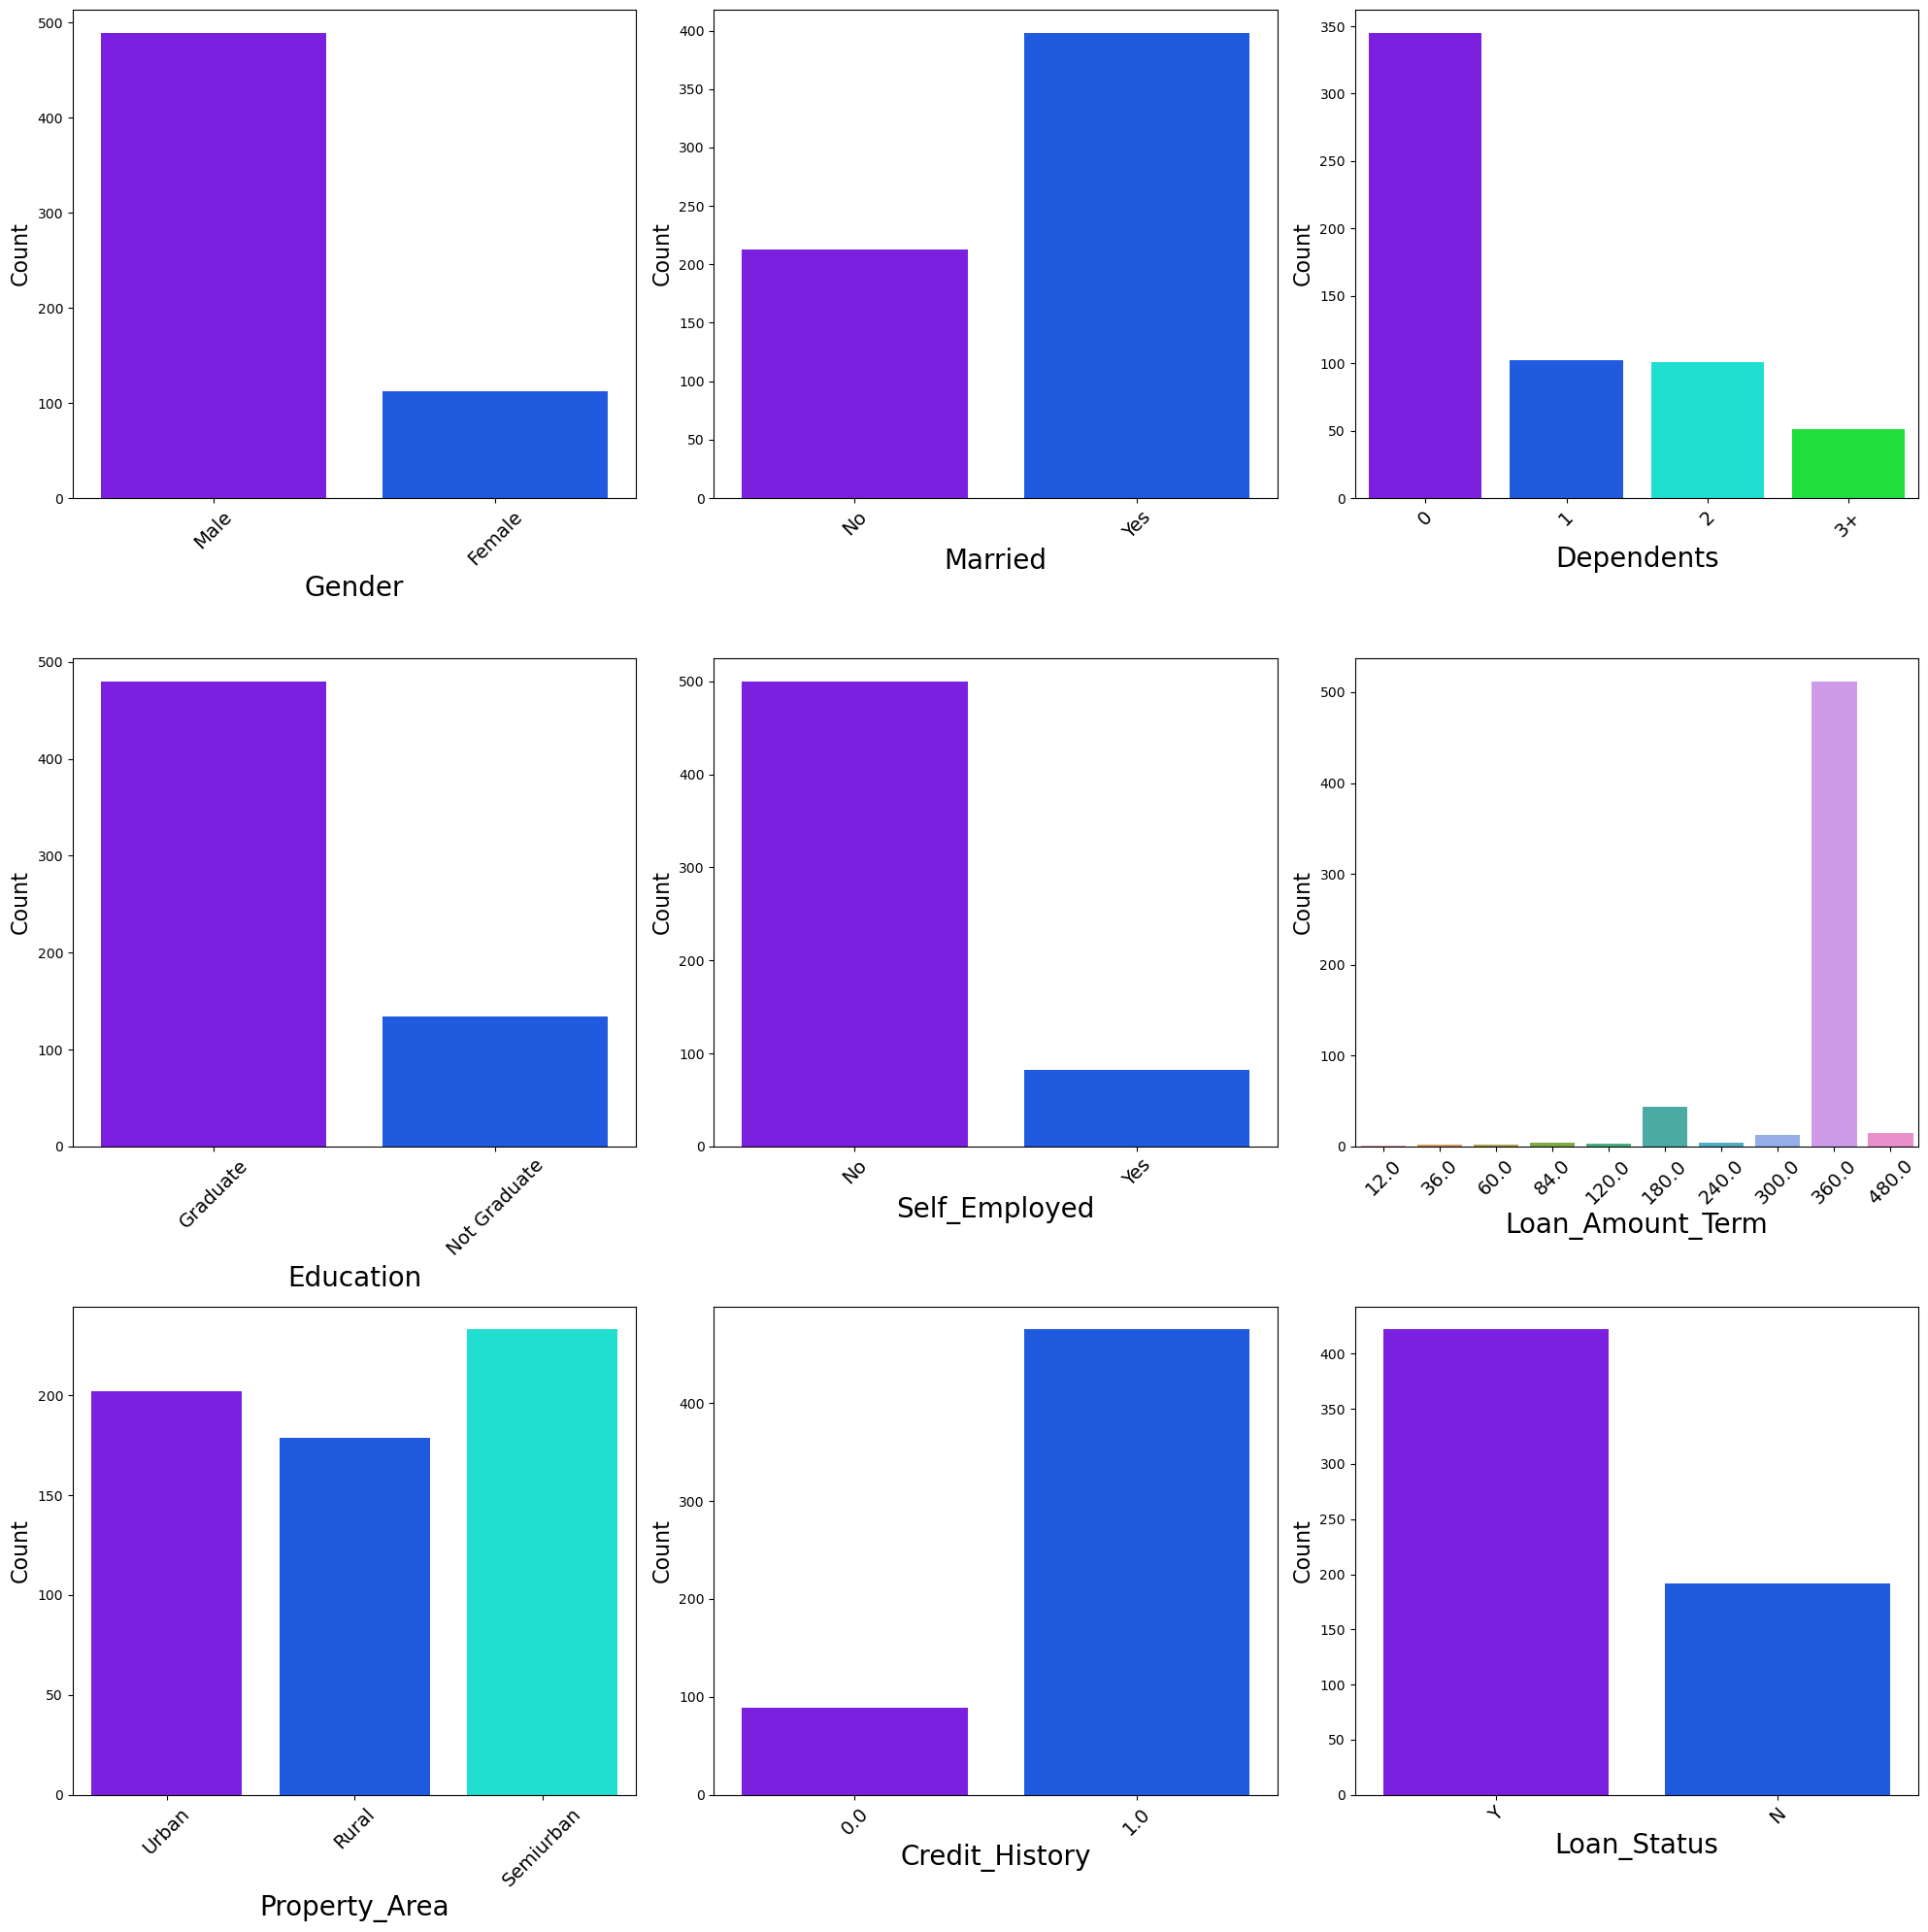

In [17]:
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=(20, 20), facecolor='white')
plotnumber = 1
category = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
            'Loan_Amount_Term', 'Property_Area', 'Credit_History', 'Loan_Status']
for i in category:
    ax = plt.subplot(3, 3, plotnumber)
    sns.countplot(x=df[i], ax=ax)
    ax.set_xlabel(i, fontsize=20)
    ax.set_ylabel('Count', fontsize=16)
    plt.xticks(rotation=45, fontsize=14)  # Rotate X labels for readability
    plotnumber += 1
    
plt.tight_layout()
plt.show()

* Out of Total loan application 80 % applicants are Male. We can Explore loan amount for each gender applied and evaluate whether on the same basis loan is approved for each gender or not?
* Only 20% applicants are self employed. So it will interesting to gain insight on relation between Applicant income and loan approval for non self employed category. We will look to find any benchmark range of Income for loan approval.Another benchmark we will try to find is about loan requirement for these two categories.
* Nearly 70% are married and 75% of loan applicants are graduates
* Almost 60% of the applicants have no dependents.
* Most of applicants come from Semi Urban areas, followed by Urban and Rural areas.
* 80% people previously have credit history. Normally people having credit history are seen more prone to get loan approval.
* Nearly 70 % applicant gets loan approved.

### Let check outliers for missing values Numerical variable having missing values by plotting boxplot.

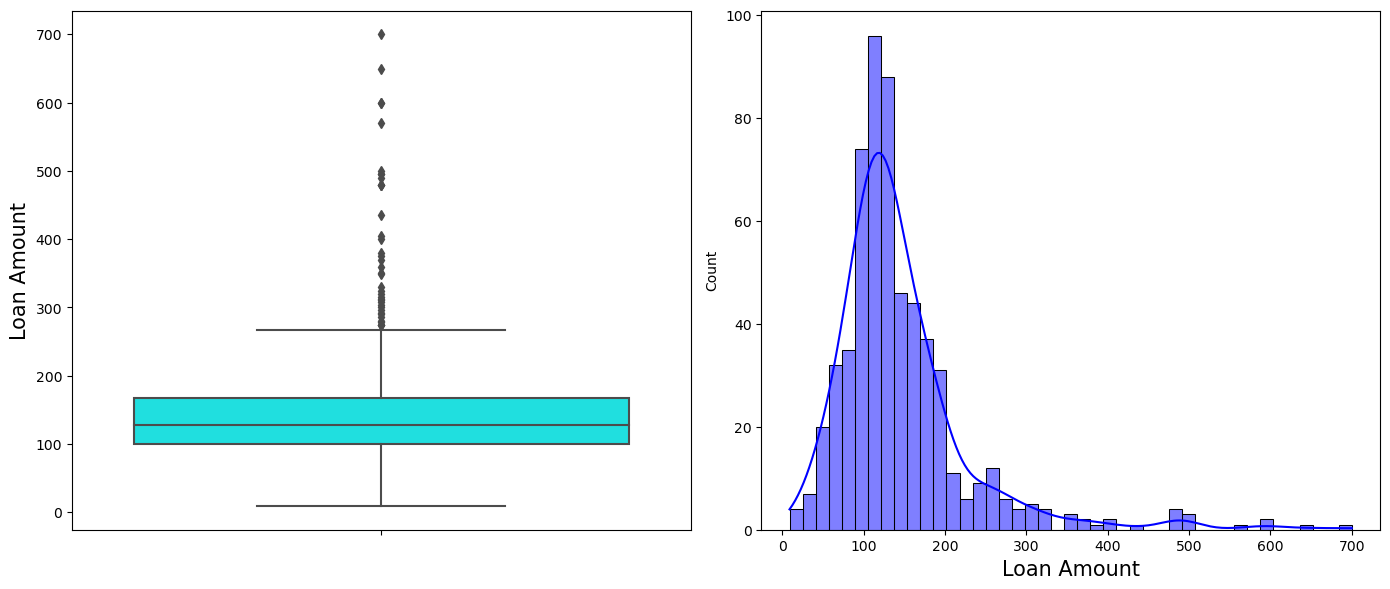

In [18]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.boxplot(y='LoanAmount', data=df, color='cyan')
plt.ylabel('Loan Amount', fontsize=15)

plt.subplot(1,2,2)
sns.histplot(df['LoanAmount'], color='b', kde=True)
plt.xlabel('Loan Amount', fontsize=15)

plt.tight_layout()
plt.show()

In [19]:
print("Mean of Loan Amount:",df['LoanAmount'].mean())
print("Median of Loan Amount:",df['LoanAmount'].median())

Mean of Loan Amount: 146.41216216216216
Median of Loan Amount: 128.0


* The mean is greater than median loan amount.
* Clearly we can see outliers in boxplot and feature is strecth to far in distribution plot.

# Imputation of Missing values

1. Missing values in Loan amount is impute with median value.
2. Maximum Loan term is 360 Months so Missing value in Loan amount term is replace with 360 Months.
3. Credit History, Self Employed, dependents, Gender and Married are replace with mode of repective features.

In [20]:
# Imputating Missing value with mode for categorical features
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

# Imputation of Numerical features
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

# Missing Value Check After Imputation

In [21]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                   Missing Values  % Missing data
Loan_ID                         0             0.0
Gender                          0             0.0
Married                         0             0.0
Dependents                      0             0.0
Education                       0             0.0
Self_Employed                   0             0.0
ApplicantIncome                 0             0.0
CoapplicantIncome               0             0.0
LoanAmount                      0             0.0
Loan_Amount_Term                0             0.0
Credit_History                  0             0.0
Property_Area                   0             0.0
Loan_Status                     0             0.0


Finally, No Missing Value is Present.

# Statistical Matrix

<Axes: >

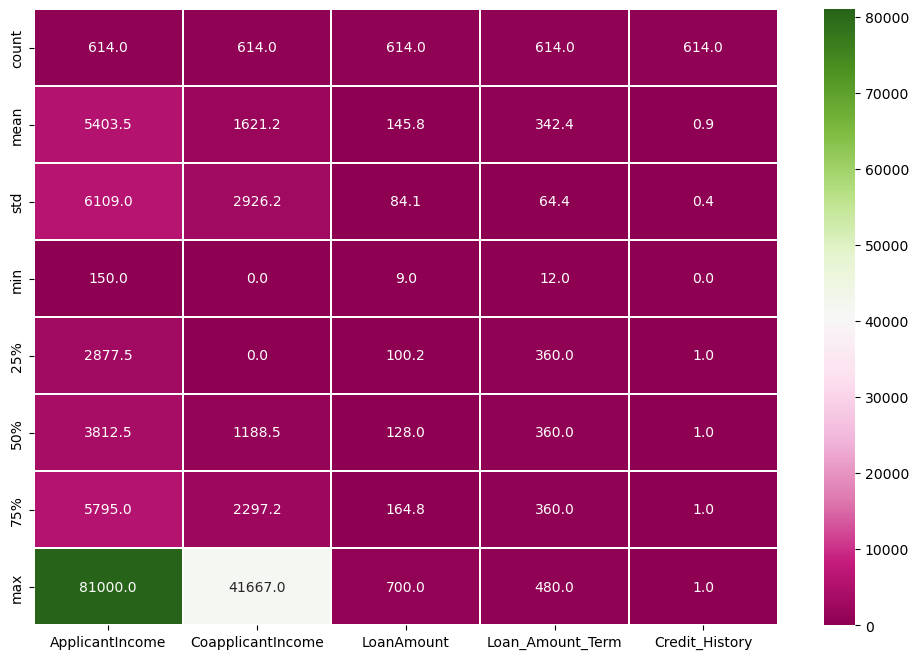

In [22]:
# Visualizing the statistics of the columns using heatmap.
plt.figure(figsize=(12,8))
sns.heatmap(df.describe(),linewidths = 0.1,fmt='0.1f',annot = True,cmap='PiYG')

In [23]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


# Target Variable

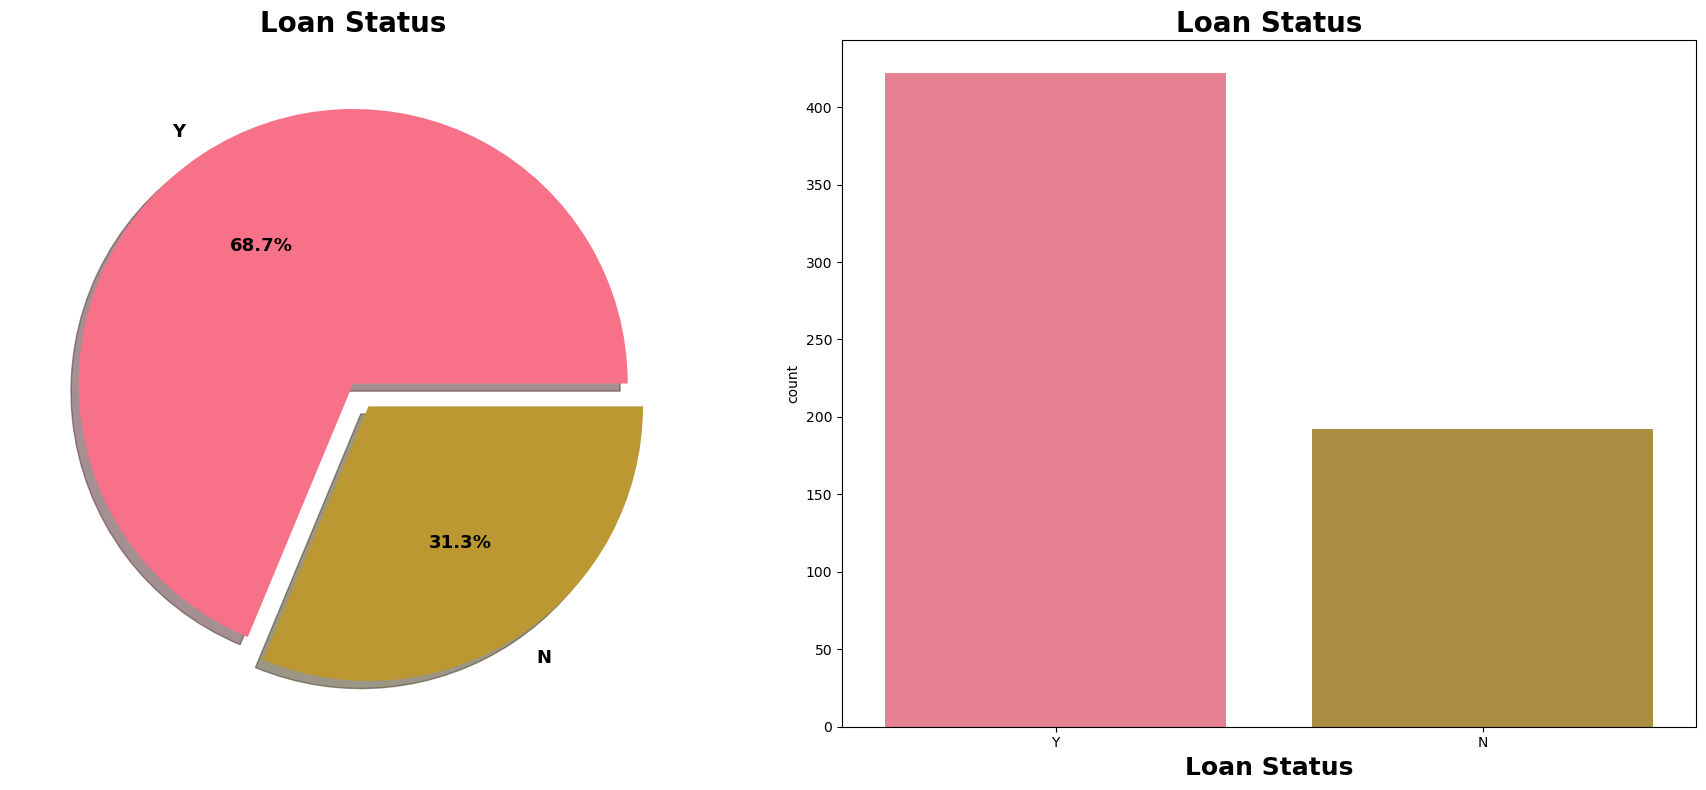

In [25]:
plt.rcParams["figure.autolayout"] = True

sns.set_palette('husl')

f, ax = plt.subplots(1, 2, figsize=(18, 8))
df['Loan_Status'].value_counts().plot.pie(explode=[0, 0.1], autopct='%2.1f%%',
                                          textprops={'fontweight': 'bold', 'fontsize': 13}, 
                                          ax=ax[0], shadow=True)
ax[0].set_title('Loan Status', fontsize=20, fontweight='bold')
ax[0].set_ylabel('')
sns.countplot(x='Loan_Status', data=df, ax=ax[1])
ax[1].set_title('Loan Status', fontsize=20, fontweight='bold')
ax[1].set_xlabel("Loan Status", fontsize=18, fontweight='bold')

plt.show()

* 68.7% Applicants gets loan Approval.
* We can see that dataset is imbalanced in nature.

# Gender Vs Loan Status

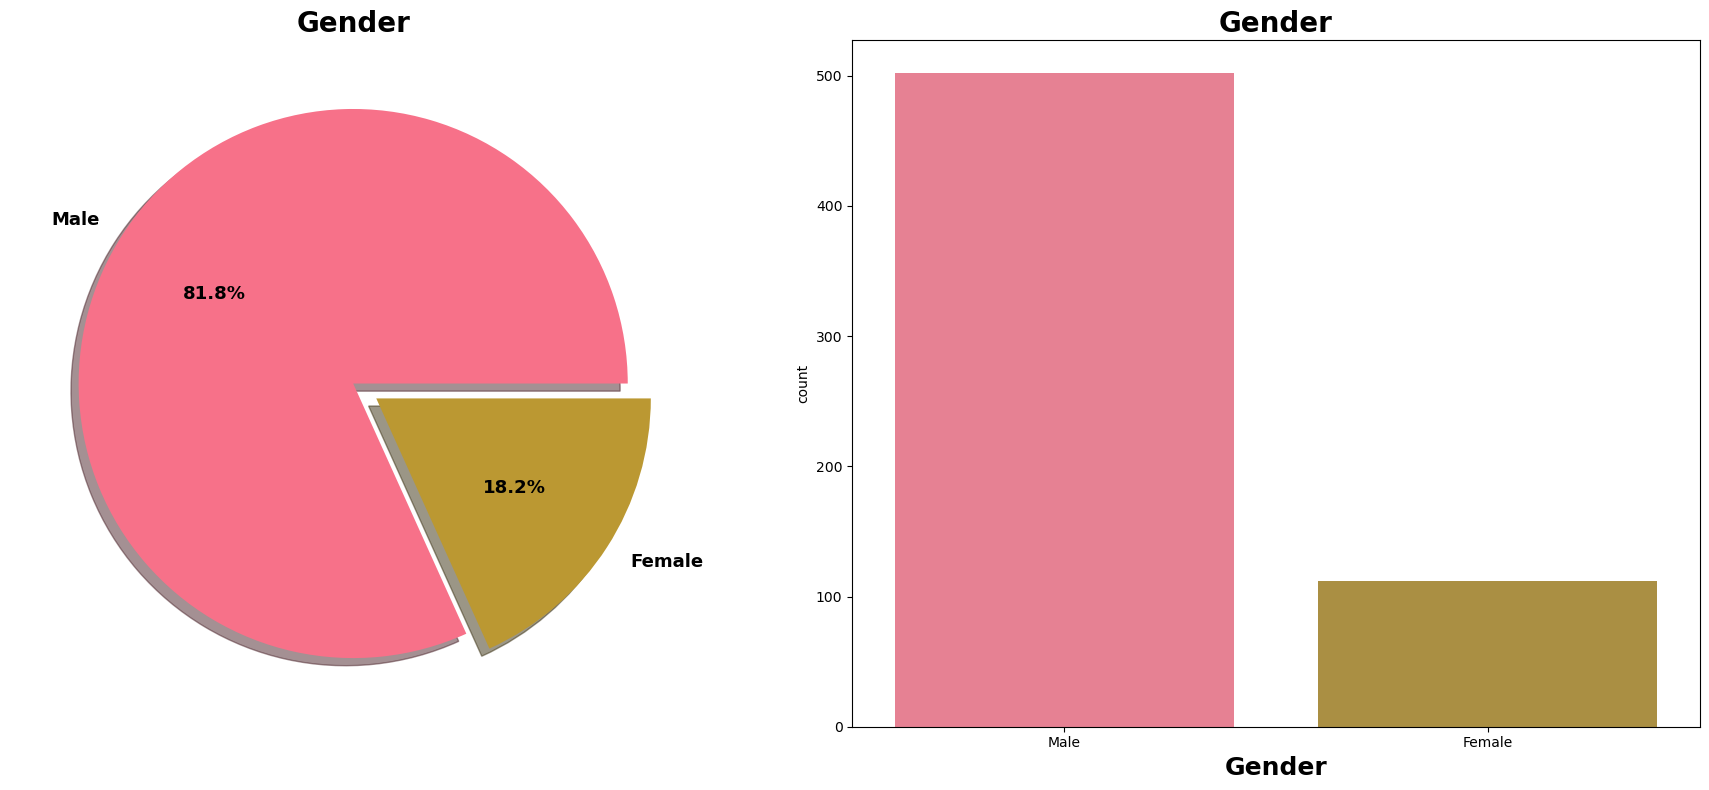

In [29]:
plt.rcParams["figure.autolayout"] = True

sns.set_palette('husl')

f, ax = plt.subplots(1, 2, figsize=(18, 8))
df['Gender'].value_counts().plot.pie(explode=[0, 0.1], autopct='%2.1f%%',
                                          textprops={'fontweight': 'bold', 'fontsize': 13}, 
                                          ax=ax[0], shadow=True)
ax[0].set_title('Gender', fontsize=20, fontweight='bold')
ax[0].set_ylabel('')
sns.countplot(x='Gender', data=df, ax=ax[1])
ax[1].set_title('Gender', fontsize=20, fontweight='bold')
ax[1].set_xlabel("Gender", fontsize=18, fontweight='bold')

plt.show()

In [30]:
pd.crosstab(df['Gender'],df["Loan_Status"], margins=True).style.background_gradient(cmap='summer_r')

Loan_Status,N,Y,All
Gender,,,
Female,37,75,112
Male,155,347,502
All,192,422,614


* 81.8% Applicant are male.
* Irrespective Gender 65 % Applicant from each gender gets loan approval.It means that gender doesnot play any role loan approval. No Discrimation on name of Gender done.

# Married Vs Loan Status

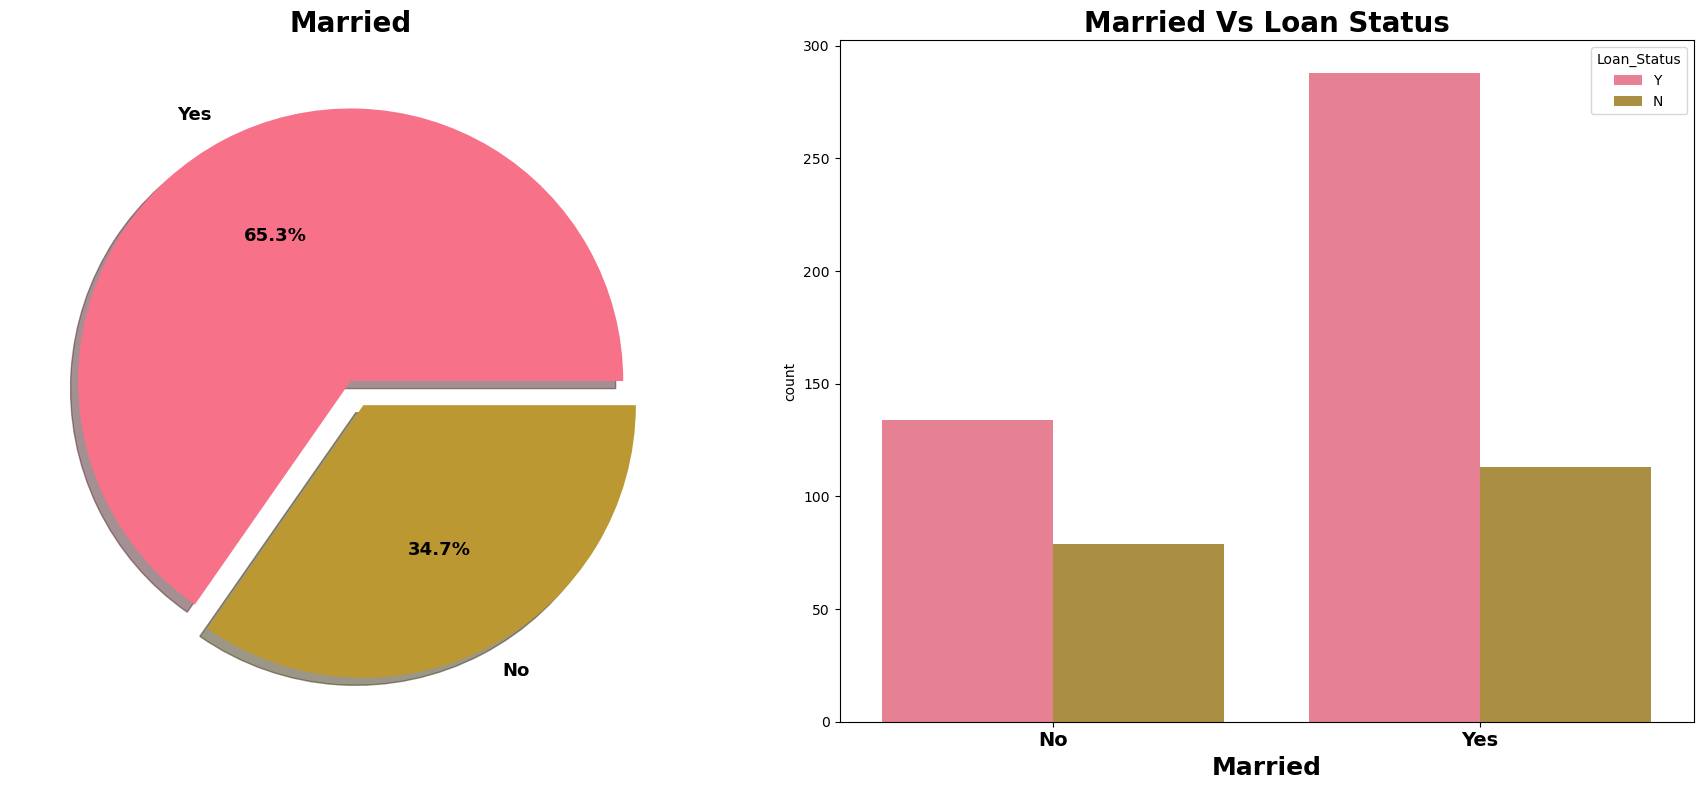

In [35]:
plt.rcParams["figure.autolayout"] = True

sns.set_palette('husl')

f, ax = plt.subplots(1, 2, figsize=(18, 8))
df['Married'].value_counts().plot.pie(
    explode=[0, 0.1], autopct='%2.1f%%',
    textprops={'fontweight': 'bold', 'fontsize': 13}, 
    ax=ax[0], shadow=True
)
ax[0].set_title('Married', fontsize=20, fontweight='bold')
ax[0].set_ylabel('')
sns.countplot(x='Married', hue='Loan_Status', data=df, ax=ax[1])
ax[1].set_title('Married Vs Loan Status', fontsize=20, fontweight='bold')
ax[1].set_xlabel('Married', fontsize=18, fontweight='bold')

plt.xticks(fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [36]:
pd.crosstab([df['Gender'],df['Married']],[df.Loan_Status],margins=True).style.background_gradient(cmap='gist_rainbow_r')

* 65.3 % loan applicants are married. We can see from Count plot that Married people have more possibility of getting loan approval.
* Unmarried Women are more chances of getting loan approval compare to married women.We will try to find which factor actually play deciding role here like education, employeement or Income.
* Married Men are more chances of loan approval.

# Let check how number dependents play here.

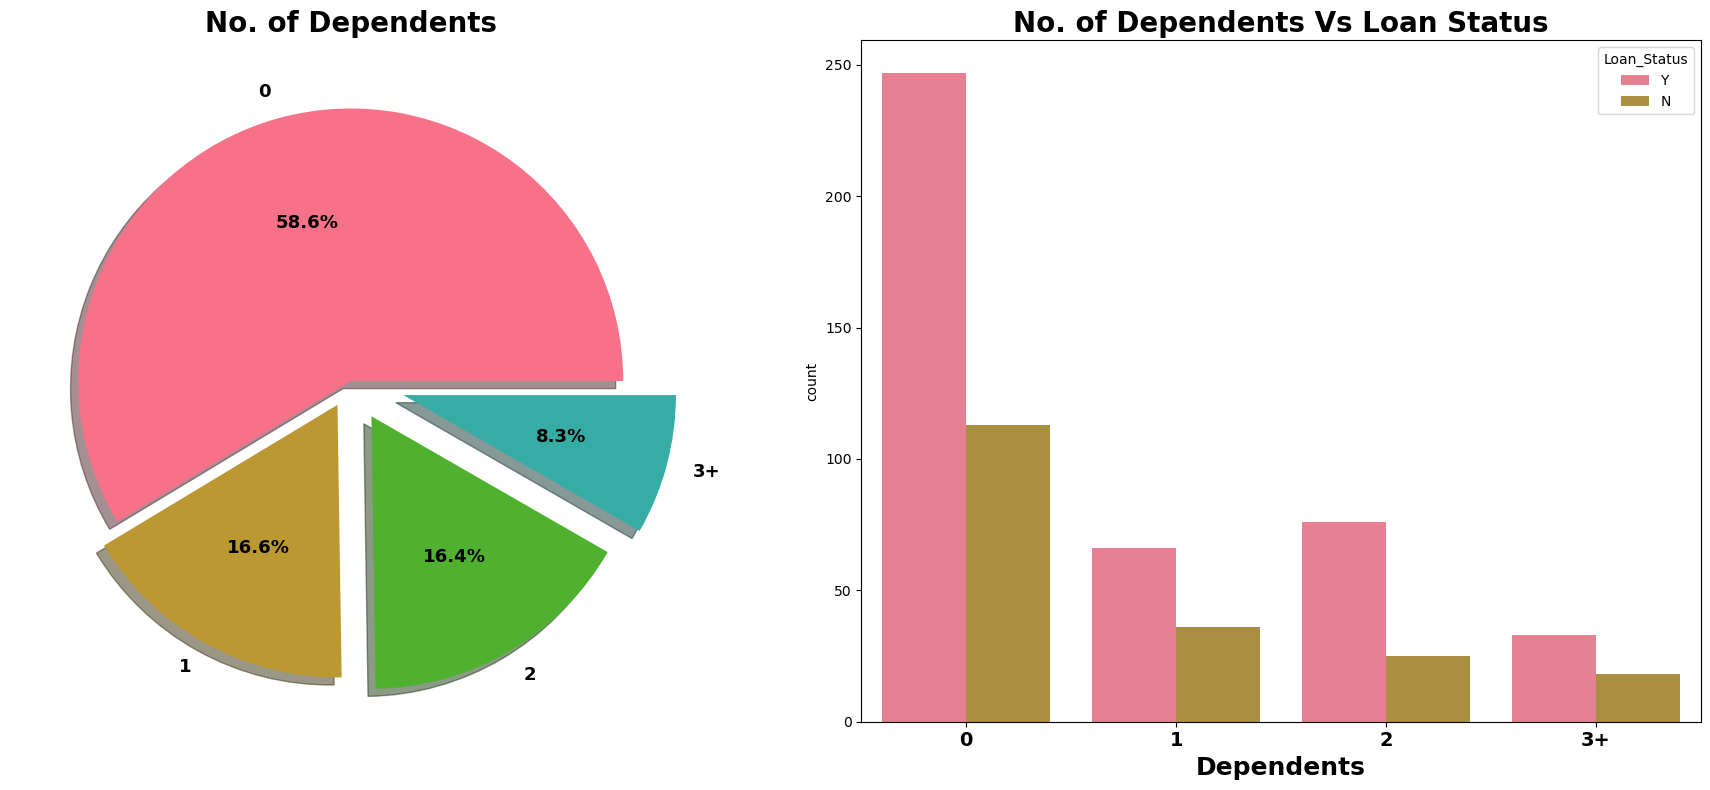

In [39]:
plt.rcParams["figure.autolayout"] = True

sns.set_palette('husl')

f, ax = plt.subplots(1, 2, figsize=(18, 8))
df['Dependents'].value_counts().plot.pie(explode=[0,0.1,0.15,0.2],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('No. of Dependents', fontsize=20, fontweight='bold')
ax[0].set_ylabel('')
sns.countplot(x='Dependents', hue='Loan_Status', data=df, ax=ax[1])
ax[1].set_title('No. of Dependents Vs Loan Status', fontsize=20, fontweight='bold')
ax[1].set_xlabel('Dependents', fontsize=18, fontweight='bold')

plt.xticks(fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [40]:
pd.crosstab([df['Dependents']],[df.Loan_Status,df['Gender']],margins=True).style.background_gradient(cmap='summer_r')

In [41]:
pd.crosstab([df['Dependents'],df['Gender']],[df.Loan_Status],margins=True).style.background_gradient(cmap='Blues')

* 58.6% Applicants have no dependents on them.33% Applicants have either 1 or 2 dependents. It will interesting check whether with increase in number dependents their is increase in requirement loan amount.
* Female having zero dependents have more chances to get loan approval compare to Females with dependents.
* For male Maximum loan approval comes with 0 dependents followed by 2 dependents.

In [42]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Education Vs Loan status

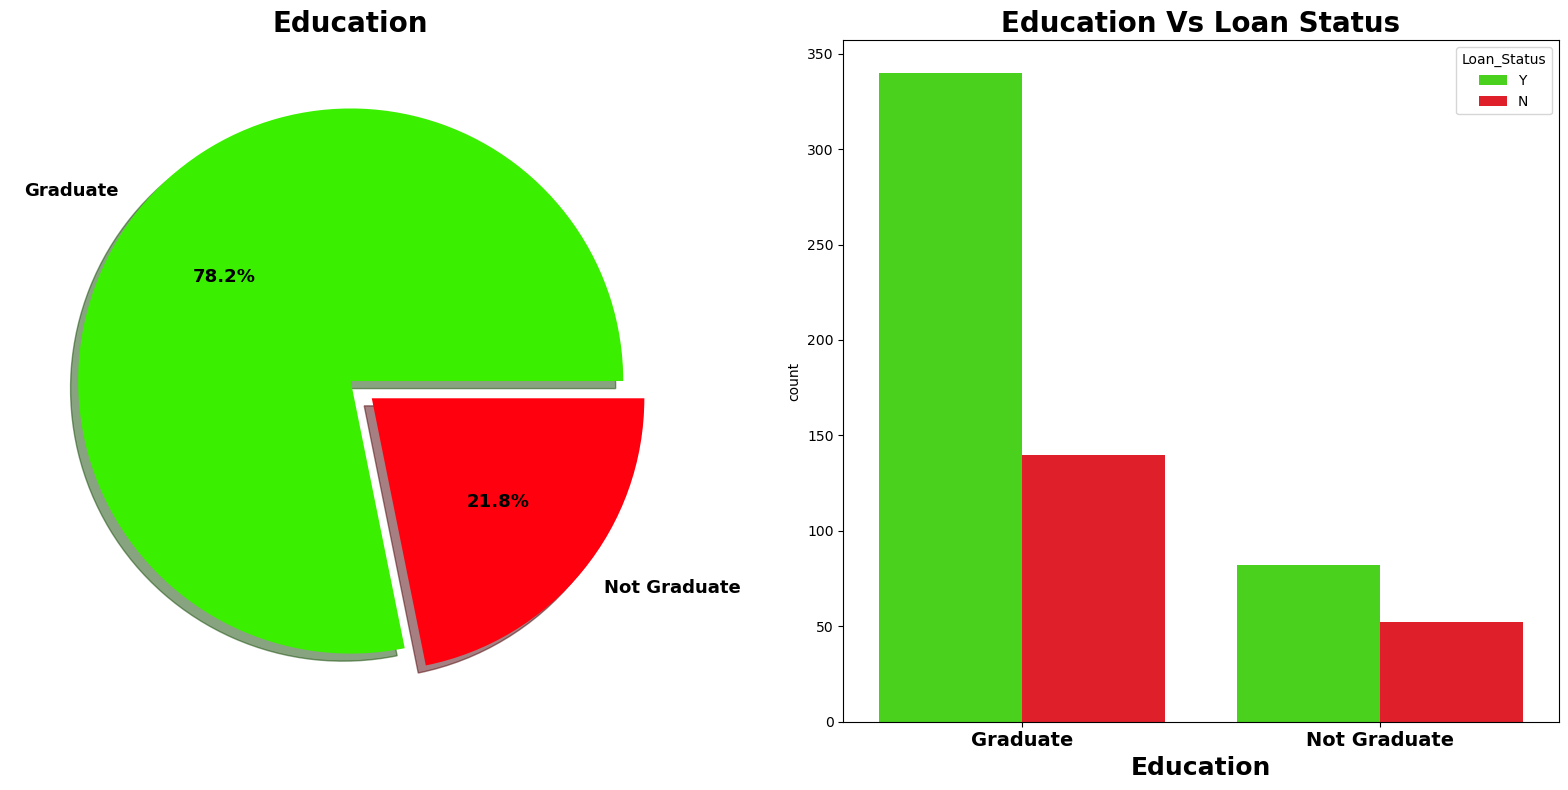

In [44]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('prism')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Education'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Education', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='Education', hue='Loan_Status', data=df, ax=ax[1])
ax[1].set_title('Education Vs Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Education",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [45]:
pd.crosstab([df['Education'],df['Gender']],[df.Loan_Status],margins=True).style.background_gradient(cmap='Blues')

* Graduate applicants are more likely to get loan approval irrespective gender.

In [46]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Encoding categorical data

In [47]:
Category=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']

In [48]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


# Feature selection and Engineering

# 1. Outliers Detection and Removal

In [49]:
Numerical =['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

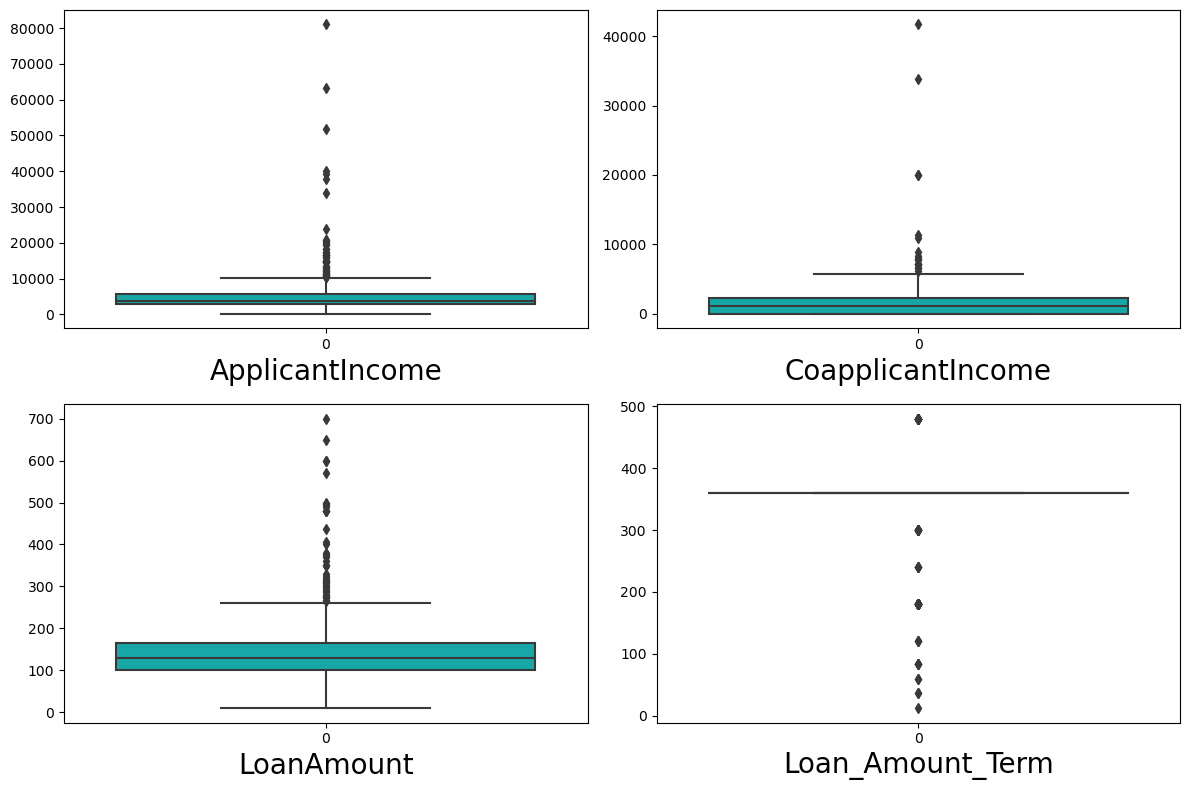

In [52]:
plt.figure(figsize=(12,8),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column],color='c')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [53]:
# Droping unnecessary columns
df.drop(["Loan_ID"], axis=1, inplace=True)

In [54]:
df['Dependents'] = df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [55]:
df['Dependents'] =pd.to_numeric(df['Dependents'])

In [56]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy()

Shape of the dataframe before removing outliers:  (614, 12)
Shape of the dataframe after removing outliers:  (577, 12)
Percentage of data loss post outlier removal:  6.026058631921824


### Data Loss

In [57]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((614-577)/614)*100,'%')

Percentage Data Loss : 6.026058631921824 %


We are losing 6.02 % of data and which Acceptable.

# 2. Skewness of features

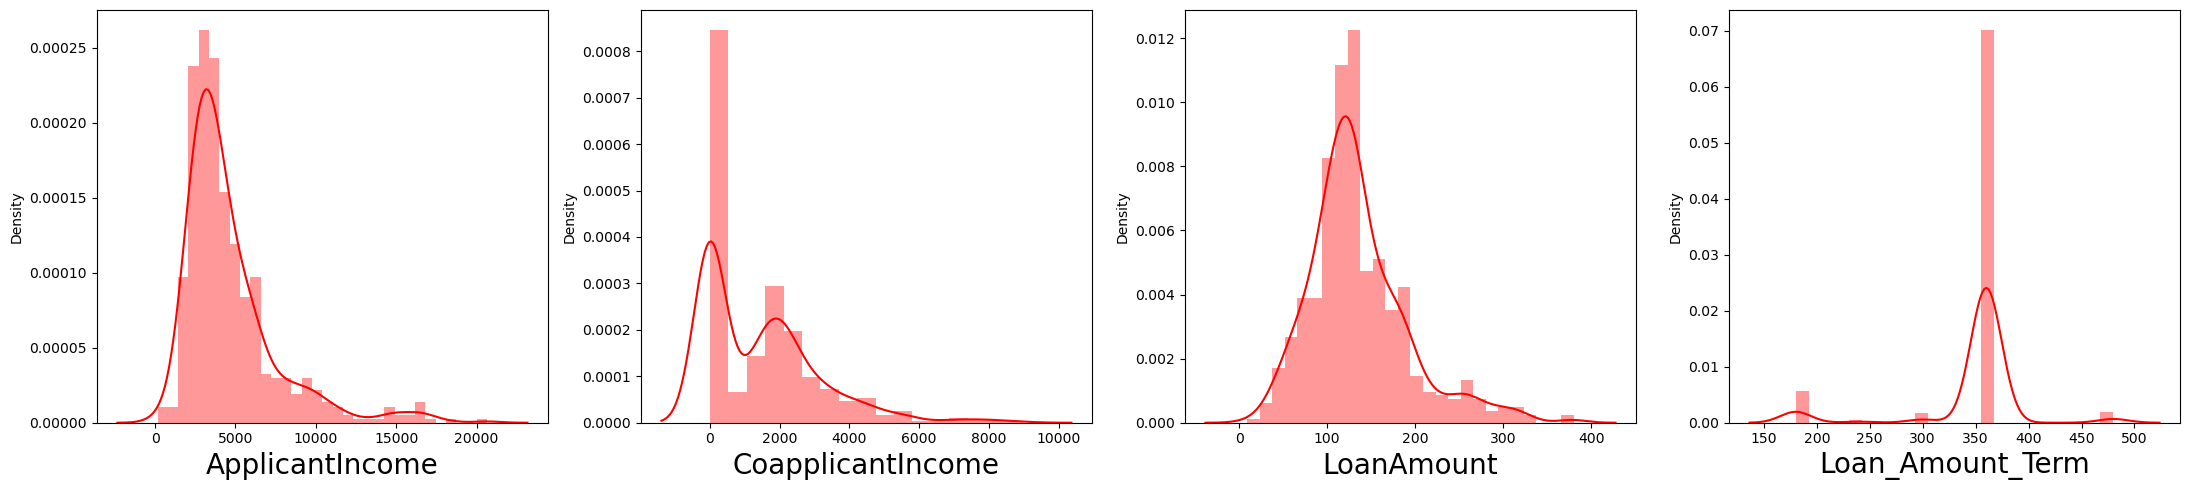

In [58]:
plt.figure(figsize=(22,5),facecolor='white')
plotnum=1
for col in Numerical:
    if plotnum<=4:
        plt.subplot(1,4,plotnum)
        sns.distplot(df[col],color='r')
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [59]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

* Out of all above feature 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount' are skewed which are numerical feature.
* Other features are categorical in nature so skewness is nothing to do with these remaining feature.We will ignore them.
* We will yeo-johnson transformation method.

In [60]:
# Removing skewness using yeo-johnson  method to get better prediction
skew = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [61]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [62]:
df[skew] = scaler.fit_transform(df[skew].values)
df[skew].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.681780,-1.122446,0.000771
1,0.234783,0.744117,0.000771
2,-0.527201,-1.122446,-1.437336
3,-0.791972,0.895786,-0.153545
4,0.728848,-1.122446,0.238260


# Checking skewness after using yeo-johnson Method

In [63]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

For Numerical variable skewness is within permissible limit.

# 3. Corrleation

In [64]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.188162,0.045696,-0.006207,0.058590,0.234551,0.172146,-0.104983,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.024783,0.335820,0.181878,-0.127348,0.019308,0.010595,0.089026
Dependents,0.188162,0.329900,1.000000,0.069814,0.044543,0.105994,0.004109,0.131772,-0.087389,-0.020288,0.002327,0.017872
Education,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.176074,0.049739,-0.128715,-0.090523,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.212260,-0.087338,0.117218,-0.032914,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.058590,-0.024783,0.105994,-0.176074,0.212260,1.000000,-0.360946,0.432154,-0.069429,0.028825,-0.011364,-0.002484
CoapplicantIncome,0.234551,0.335820,0.004109,0.049739,-0.087338,-0.360946,1.000000,0.200081,0.000951,0.006564,-0.074476,0.079344
LoanAmount,0.172146,0.181878,0.131772,-0.128715,0.117218,0.432154,0.200081,1.000000,0.049057,-0.003626,-0.098090,-0.023609
Loan_Amount_Term,-0.104983,-0.127348,-0.087389,-0.090523,-0.032914,-0.069429,0.000951,0.049057,1.000000,0.027392,-0.057004,-0.020291
Credit_History,0.013172,0.019308,-0.020288,-0.075217,-0.016390,0.028825,0.006564,-0.003626,0.027392,1.000000,-0.008121,0.560936


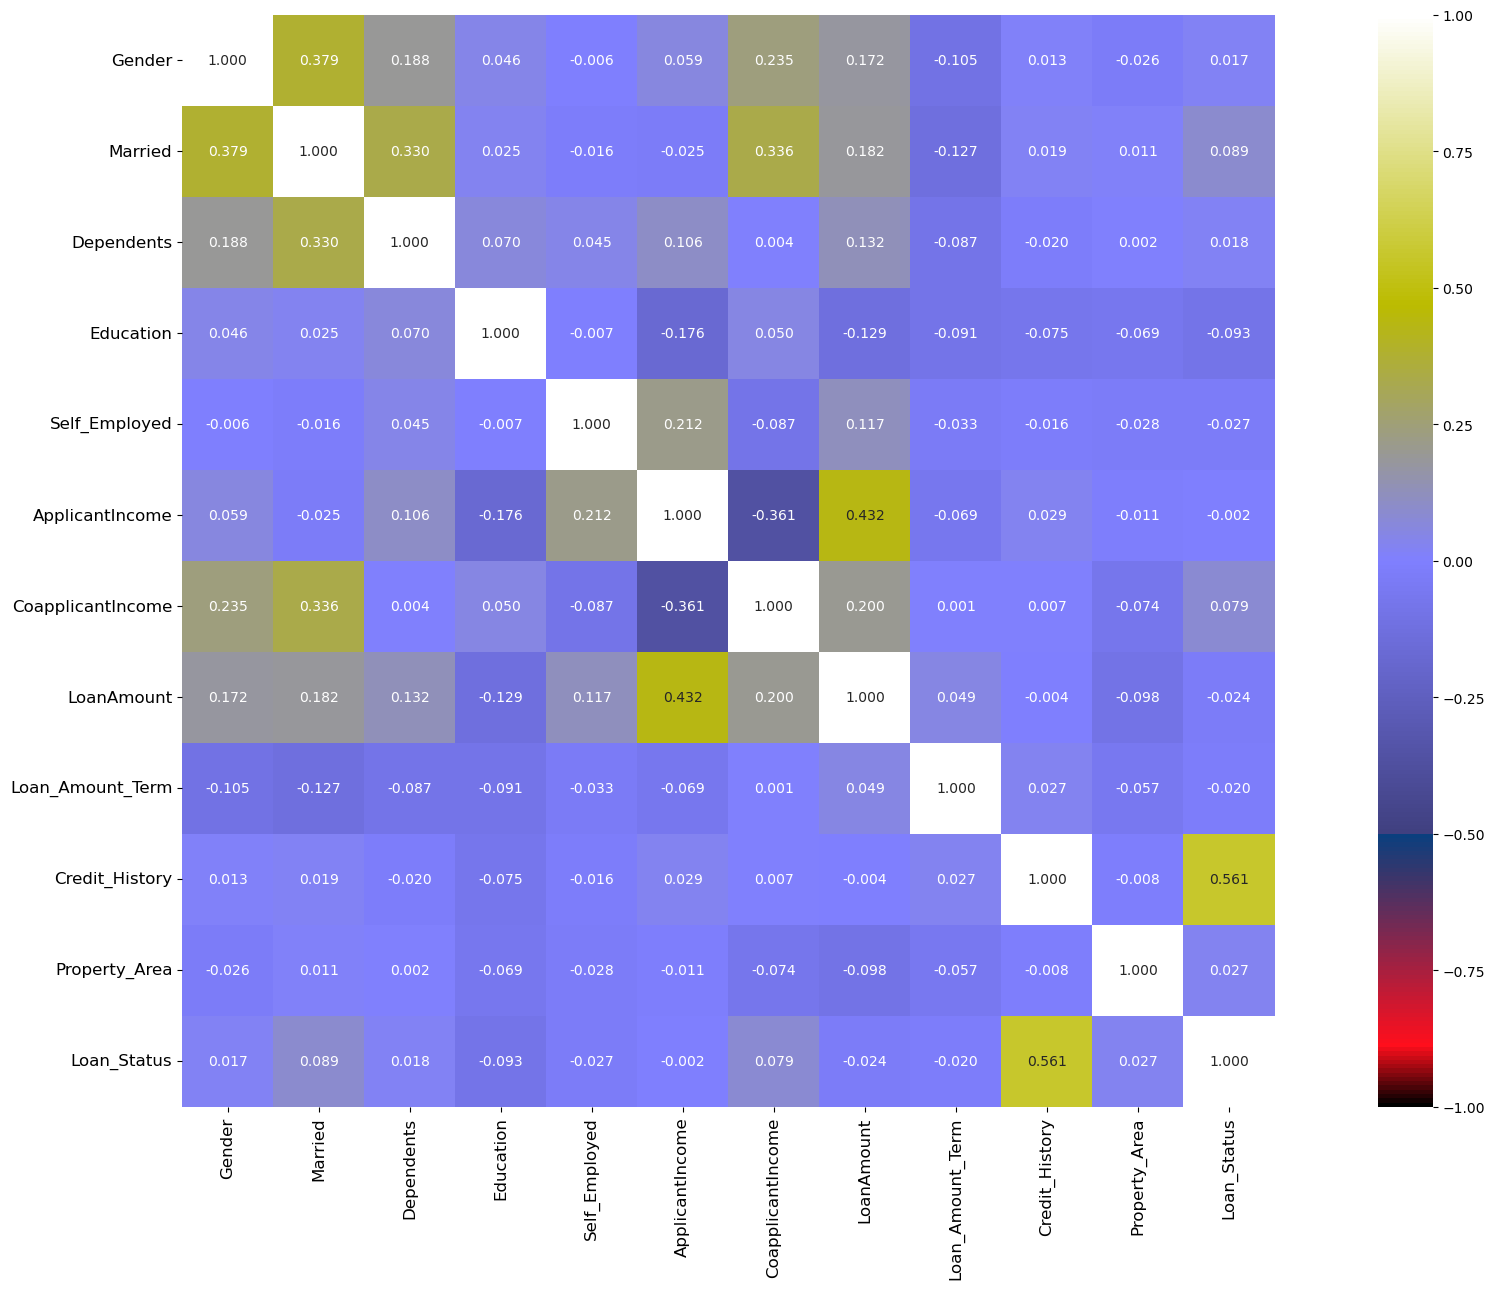

In [65]:
plt.figure(figsize=(21,13))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

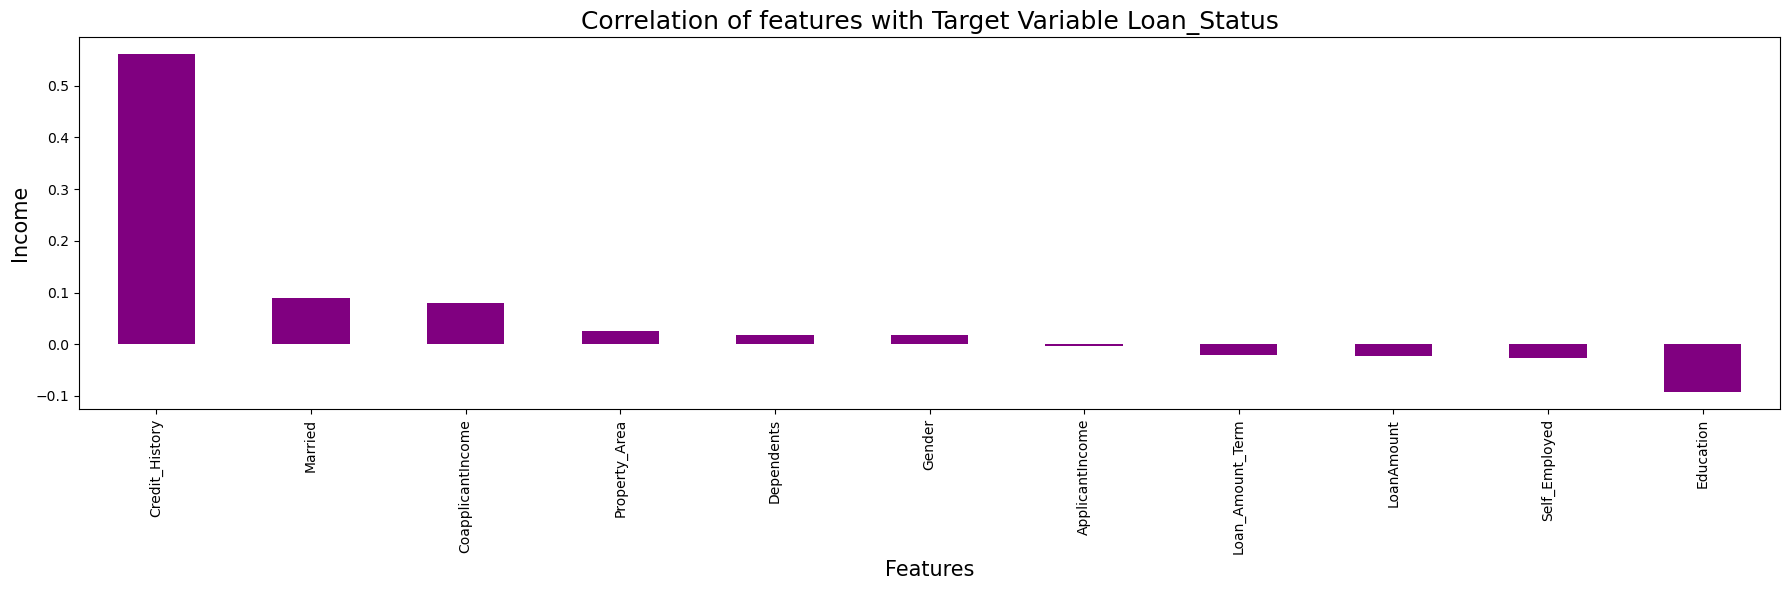

In [66]:
plt.figure(figsize = (18,6))
df.corr()['Loan_Status'].drop(['Loan_Status']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Income',fontsize=15)
plt.title('Correlation of features with Target Variable Loan_Status',fontsize = 18)
plt.show()

## 4. Checking Multicollinearity between features using variance_inflation_factor

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

,VIF,Features
0,6.119789,Gender
1,3.963538,Married
2,1.778377,Dependents
3,1.355469,Education
4,1.197219,Self_Employed
5,1.756726,ApplicantIncome
6,1.596438,CoapplicantIncome
7,1.548450,LoanAmount
8,10.415255,Loan_Amount_Term
9,9.483180,Credit_History


So No Need to Worry About Multicollinearity.

# 5. Balanceing Imbalanced target feature

In [68]:
df.Loan_Status.value_counts()

Loan_Status
1    398
0    179
Name: count, dtype: int64

As Target variable data is Imbalanced in nature we will need to balance target variable.

## Balancing using SMOTE

In [69]:
from imblearn.over_sampling import SMOTE

In [70]:
# Splitting data in target and dependent feature
X = df.drop(['Loan_Status'], axis =1)
Y = df['Loan_Status']

In [71]:
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [72]:
Y.value_counts()

Loan_Status
1    398
0    398
Name: count, dtype: int64

# Standard Scaling

In [73]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

# Machine Learning Model Building

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (557, 11)
Training target vector size: (557,)
Test feature matrix size: (239, 11)
Test target vector size: (239,)


# Finding best Random state

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8117154811715481 on Random_state 29


# Logistics Regression Model

In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=78, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.8075313807531381


Confusion matrix of Logistics Regression : 
 [[ 74  36]
 [ 10 119]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.88      0.67      0.76       110
           1       0.77      0.92      0.84       129

    accuracy                           0.81       239
   macro avg       0.82      0.80      0.80       239
weighted avg       0.82      0.81      0.80       239



# Finding Optimal value of n_neighbors for KNN

In [79]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(25):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.4619406036915484
RMSE value for k=  2 is: 0.5052030537546389
RMSE value for k=  3 is: 0.4840553929365547
RMSE value for k=  4 is: 0.5526656589149836
RMSE value for k=  5 is: 0.4968520148758506
RMSE value for k=  6 is: 0.5215041008435626
RMSE value for k=  7 is: 0.4883581921595791
RMSE value for k=  8 is: 0.50104493321917
RMSE value for k=  9 is: 0.47091116165974684
RMSE value for k=  10 is: 0.4753329597178616
RMSE value for k=  11 is: 0.47091116165974684
RMSE value for k=  12 is: 0.49262341019056577
RMSE value for k=  13 is: 0.47091116165974684
RMSE value for k=  14 is: 0.50104493321917
RMSE value for k=  15 is: 0.4840553929365547
RMSE value for k=  16 is: 0.5093272287453544
RMSE value for k=  17 is: 0.4753329597178616
RMSE value for k=  18 is: 0.49262341019056577
RMSE value for k=  19 is: 0.4619406036915484
RMSE value for k=  20 is: 0.4753329597178616
RMSE value for k=  21 is: 0.44345543143056887
RMSE value for k=  22 is: 0.44814821218396267
RMSE value for k

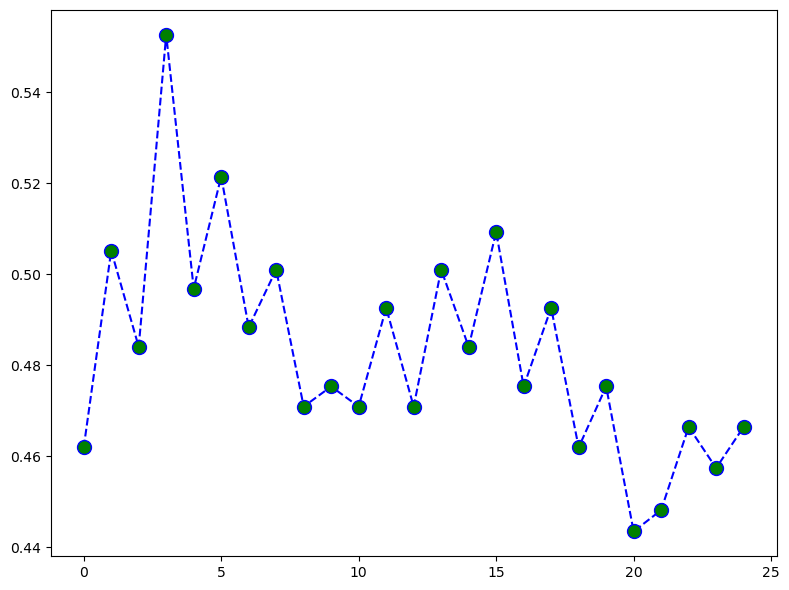

In [80]:
#plotting the rmse values against k values -
plt.figure(figsize = (8,6))
plt.plot(range(25), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

At k=3, we get the minimum RMSE value which approximately 0.44814821218396267, and shoots up on further increasing the k value. We can safely say that k=3 will give us the best result in this case

# Applying other classification algorithm

Classification ML Algorithm Evaluation Matrix for SVC(probability=True) is


Accuracy Score :
 0.8117154811715481


Confusion Matrix : 
 [[ 80  30]
 [ 15 114]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.73      0.78       110
           1       0.79      0.88      0.84       129

    accuracy                           0.81       239
   macro avg       0.82      0.81      0.81       239
weighted avg       0.81      0.81      0.81       239





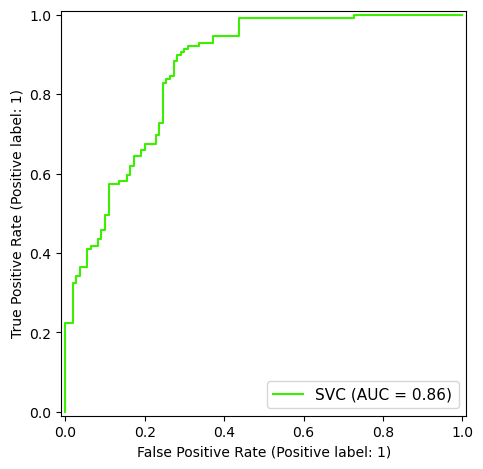

Classification ML Algorithm Evaluation Matrix for GaussianNB() is


Accuracy Score :
 0.7573221757322176


Confusion Matrix : 
 [[ 66  44]
 [ 14 115]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.60      0.69       110
           1       0.72      0.89      0.80       129

    accuracy                           0.76       239
   macro avg       0.77      0.75      0.75       239
weighted avg       0.77      0.76      0.75       239





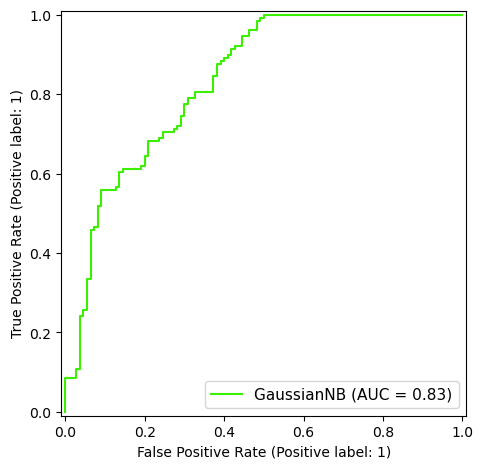

Classification ML Algorithm Evaluation Matrix for DecisionTreeClassifier() is


Accuracy Score :
 0.7698744769874477


Confusion Matrix : 
 [[88 22]
 [33 96]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.73      0.80      0.76       110
           1       0.81      0.74      0.78       129

    accuracy                           0.77       239
   macro avg       0.77      0.77      0.77       239
weighted avg       0.77      0.77      0.77       239





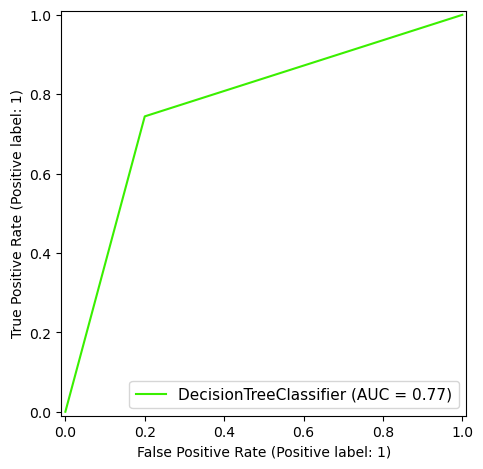

Classification ML Algorithm Evaluation Matrix for KNeighborsClassifier(n_neighbors=3) is


Accuracy Score :
 0.7656903765690377


Confusion Matrix : 
 [[ 82  28]
 [ 28 101]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.75      0.75      0.75       110
           1       0.78      0.78      0.78       129

    accuracy                           0.77       239
   macro avg       0.76      0.76      0.76       239
weighted avg       0.77      0.77      0.77       239





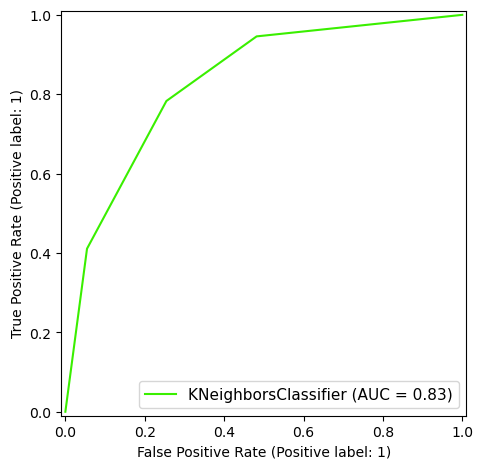

Classification ML Algorithm Evaluation Matrix for RandomForestClassifier() is


Accuracy Score :
 0.8577405857740585


Confusion Matrix : 
 [[ 93  17]
 [ 17 112]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       110
           1       0.87      0.87      0.87       129

    accuracy                           0.86       239
   macro avg       0.86      0.86      0.86       239
weighted avg       0.86      0.86      0.86       239





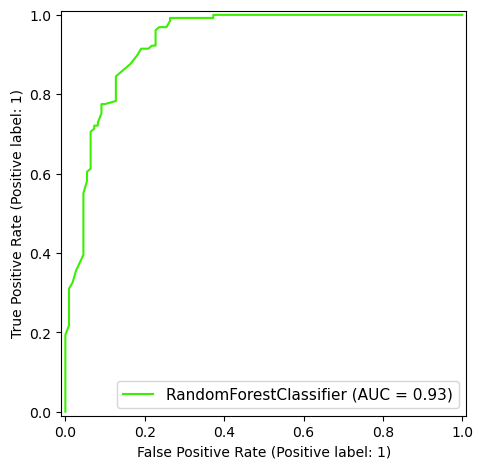

Classification ML Algorithm Evaluation Matrix for ExtraTreesClassifier() is


Accuracy Score :
 0.8326359832635983


Confusion Matrix : 
 [[ 92  18]
 [ 22 107]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.84      0.82       110
           1       0.86      0.83      0.84       129

    accuracy                           0.83       239
   macro avg       0.83      0.83      0.83       239
weighted avg       0.83      0.83      0.83       239





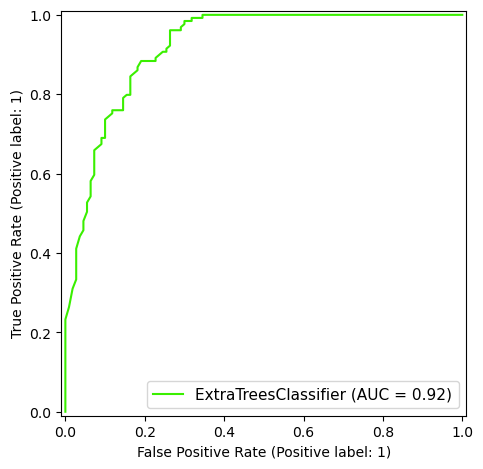

In [83]:
from sklearn.metrics import RocCurveDisplay

model = [ 
    SVC(probability=True),  # SVC needs probability=True for ROC curve
    GaussianNB(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(n_neighbors=3),
    RandomForestClassifier(),
    ExtraTreesClassifier()
]

for m in model:
    m.fit(X_train, Y_train)
    y_pred = m.predict(X_test)
    
    print('\033[1m' + 'Classification ML Algorithm Evaluation Matrix for ' + str(m) + ' is' + '\033[0m')
    print('\n')
    print('\033[1m' + 'Accuracy Score :' + '\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m' + 'Confusion Matrix :' + '\033[0m \n', confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m' + 'Classification Report :' + '\033[0m \n', classification_report(Y_test, y_pred))
    print('\n')
    
    
    RocCurveDisplay.from_estimator(m, X_test, Y_test)
    plt.legend(prop={'size': 11}, loc='lower right')
    plt.show()
    
    print('============================================================================================================')

# CrossValidation :

In [84]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.6875     0.71698113 0.74213836 0.78616352 0.79874214]
Mean Score : 0.7463050314465408
Std deviation : 0.04165005008645757




Cross Validation Score SVC() :

Score : [0.7125     0.74842767 0.76100629 0.77987421 0.79245283]
Mean Score : 0.7588522012578617
Std deviation : 0.027686692559771967




Cross Validation Score GaussianNB() :

Score : [0.69375    0.71069182 0.73584906 0.78616352 0.74842767]
Mean Score : 0.7349764150943396
Std deviation : 0.031909799206391025




Cross Validation Score DecisionTreeClassifier() :

Score : [0.7375     0.77358491 0.73584906 0.78616352 0.72955975]
Mean Score : 0.7525314465408804
Std deviation : 0.02283116324132307




Cross Validation Score KNeighborsClassifier(n_neighbors=3) :

Score : [0.75       0.69811321 0.73584906 0.75471698 0.78616352]
Mean Score : 0.7449685534591196
Std deviation : 0.028621535227629603




Cross Validation Score RandomForestClassifier() :

Score : [0.775      0.786163

# Hyper Parameter Tuning : GridSearchCV

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [87]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 1/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 2/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 2/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 3/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 3/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 4/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 4/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 5/5; 1/16

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=10)

In [88]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'log2',
 'n_estimators': 70}

# Final Model

<Figure size 1000x1000 with 0 Axes>

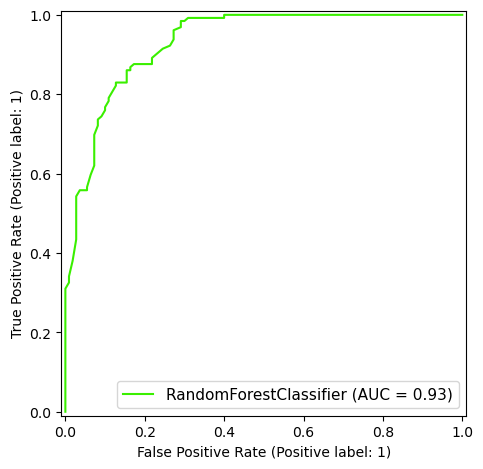

AUC Score :
 0.9312191684284707


In [92]:
Final_mod = RandomForestClassifier()
Final_mod.fit(X_train, Y_train)
plt.figure(figsize=(10,10))
disp = RocCurveDisplay.from_estimator(Final_mod, X_test, Y_test)
plt.legend(prop={'size':11}, loc='lower right')
plt.show()
auc_score = roc_auc_score(Y_test, Final_mod.predict_proba(X_test)[:, 1])
print('\033[1m' + 'AUC Score :' + '\033[0m\n', auc_score)

# Saving model

In [93]:
import joblib
joblib.dump(Final_mod,'Loan_Status_Final.pkl')

['Loan_Status_Final.pkl']